# Comparing coverage from head tissue illumina data vs thorax tissue ONT data

### Trying to filter out non-bee contigs.


In [1]:
oblob <- read.table("/workspace/hraijc/Bee/BeeT/Assemblies/blobplots/HIFIASM18.blobplot.HIFIASM18.blobplot.blobDB.table.txt", header = T)
iblob <- read.table("/workspace/hraijc/Bee/BeeT/Assemblies/blobplots/BeeT_HIFIASM18_NIFRLiF61.blobplot.BeeT_HIFIASM18_NIFRLiF61.blobplot.blobDB.table.txt", header = T)

In [2]:
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
head(oblob)

,name,length,GC,N,bam0,phylum.t.6.s,phylum.s.7.s,phylum.c.8
,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<int>
1,ptg000001l,100575,0.3345,0,12.6248,Arthropoda,953,0
2,ptg000002l,104498,0.3282,0,8.4941,no-hit,0,0
3,ptg000003l,20880,0.3689,0,9.2938,no-hit,0,0
4,ptg000004l,30390,0.3247,0,13.7958,no-hit,0,0
5,ptg000005l,208955,0.3458,0,10.3073,Arthropoda,165,0
6,ptg000006l,117612,0.3550,0,10.1645,Arthropoda,152,0


In [4]:
blob <- full_join(oblob, iblob, by="name") %>% 
rename("obam0"="bam0.x","ibam0"="bam0.y")


In [5]:
head(blob)

,name,length.x,GC.x,N.x,obam0,phylum.t.6.s.x,phylum.s.7.s.x,phylum.c.8.x,length.y,GC.y,N.y,ibam0,phylum.t.6.s.y,phylum.s.7.s.y,phylum.c.8.y
,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<int>
1,ptg000001l,100575,0.3345,0,12.6248,Arthropoda,953,0,100575,0.3345,0,3.9648,Arthropoda,953,0
2,ptg000002l,104498,0.3282,0,8.4941,no-hit,0,0,104498,0.3282,0,3.2616,no-hit,0,0
3,ptg000003l,20880,0.3689,0,9.2938,no-hit,0,0,20880,0.3689,0,3.6570,no-hit,0,0
4,ptg000004l,30390,0.3247,0,13.7958,no-hit,0,0,30390,0.3247,0,4.0673,no-hit,0,0
5,ptg000005l,208955,0.3458,0,10.3073,Arthropoda,165,0,208955,0.3458,0,3.9588,Arthropoda,165,0
6,ptg000006l,117612,0.3550,0,10.1645,Arthropoda,152,0,117612,0.3550,0,3.5882,Arthropoda,152,0


## Comparing coverage of read used to make genome assembly from head tisue (ibam) to thorax tissue (obam)

Warning message:
"Removed 19 rows containing missing values (geom_point)."


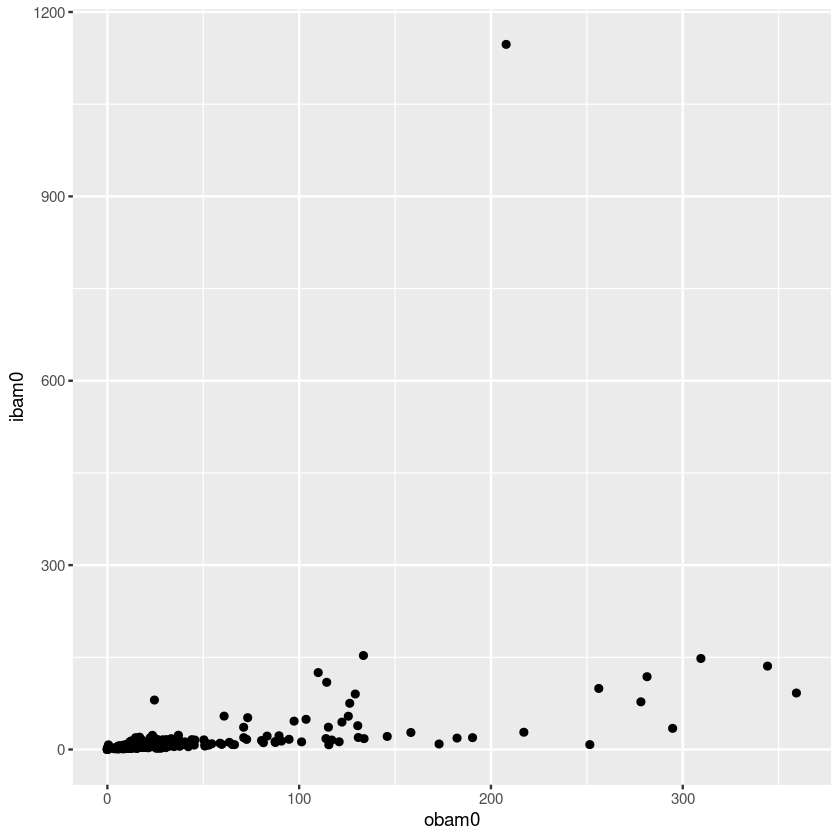

Warning message:
"Removed 19 rows containing non-finite values (stat_binhex)."
Warning message:
"Removed 2 rows containing missing values (geom_hex)."


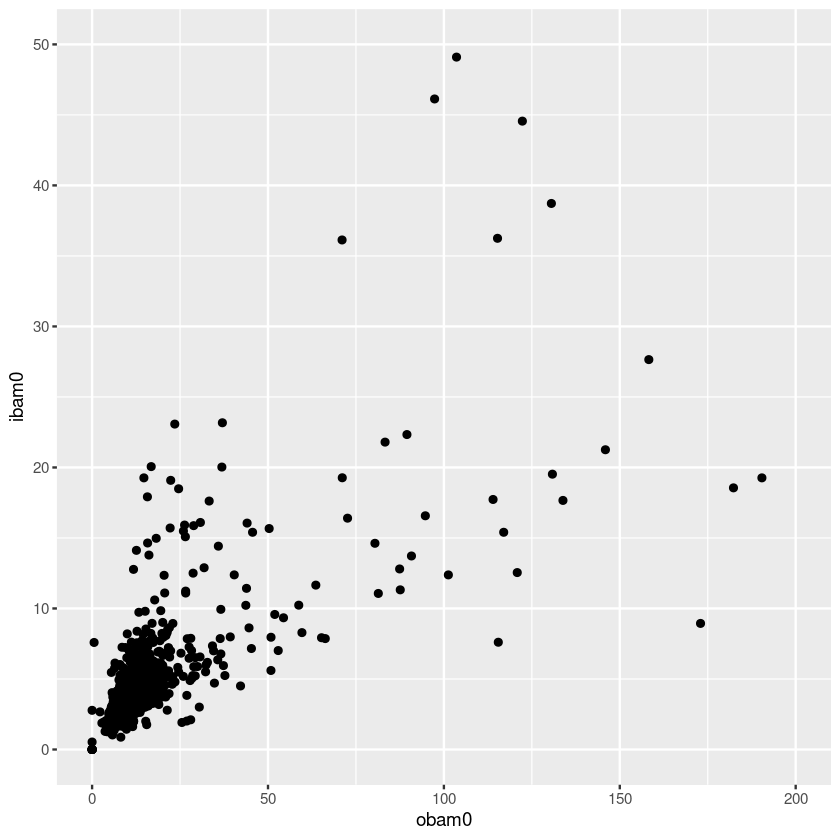

Warning message:
"Removed 319 rows containing non-finite values (stat_density2d)."


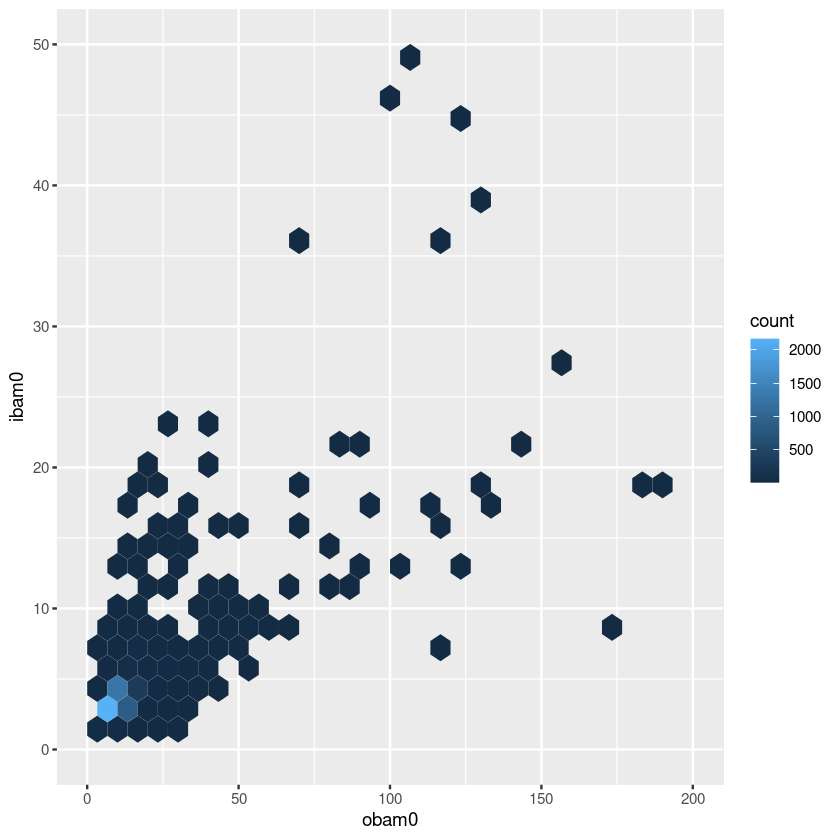

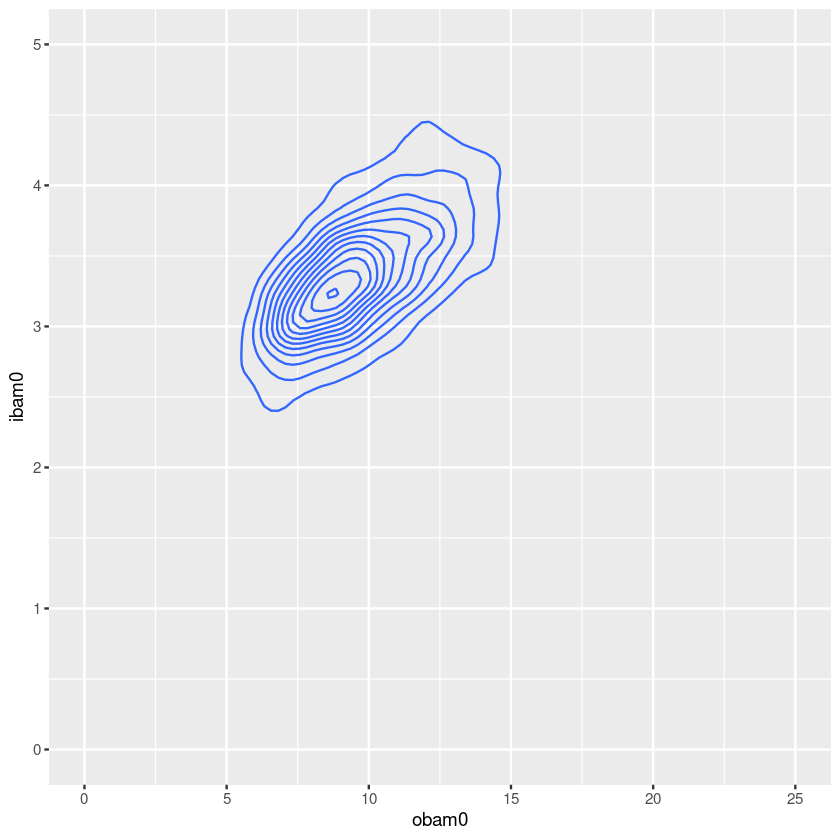

In [6]:
e <- ggplot(blob,aes(obam0,ibam0))
e + geom_point()
e + geom_point() + ylim(0,50) + xlim(0,200)
e + geom_hex()+ ylim(0,50) + xlim(0,200)
e + geom_density2d()+ ylim(0,5) + xlim(0,25)

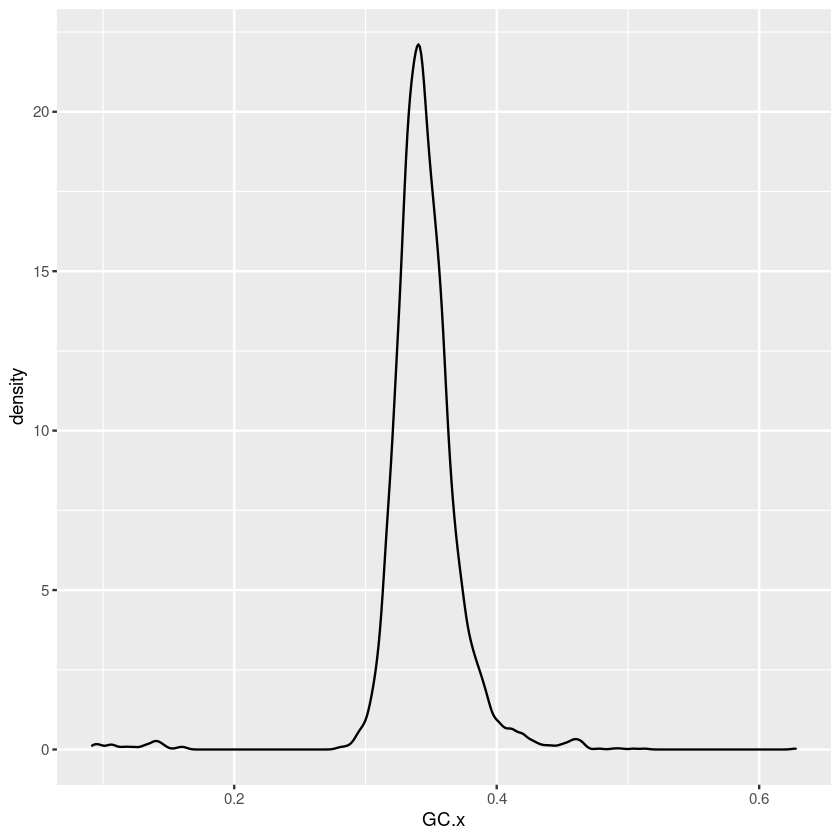

In [9]:
#GC Content distribution
c <- ggplot(blob,aes(GC.x))
c+ geom_density(kernel="gaussian") 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 4927 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


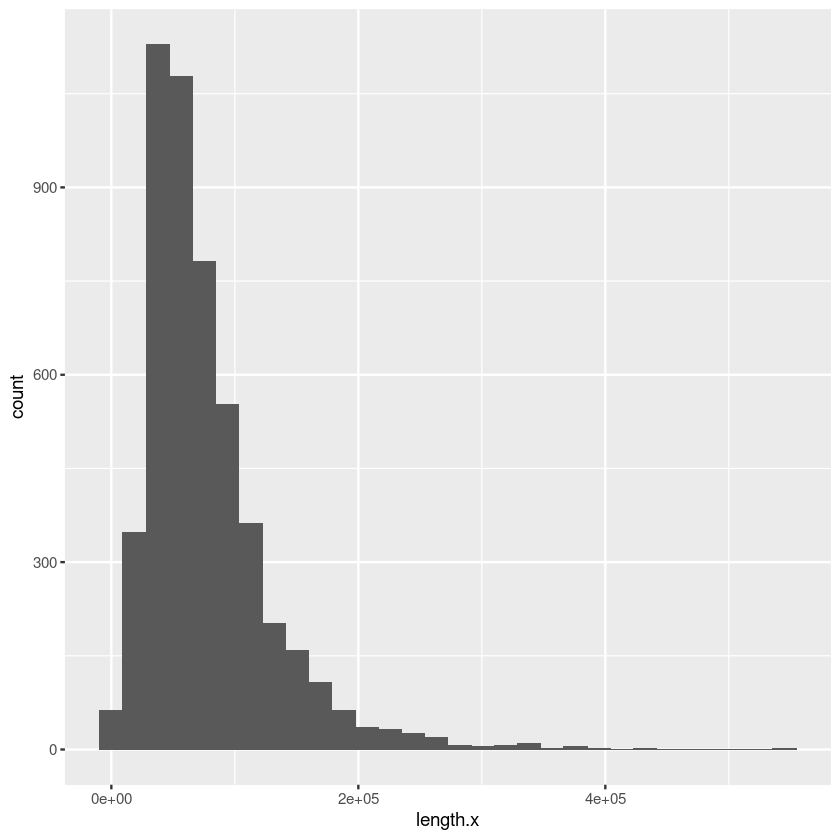

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 66 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


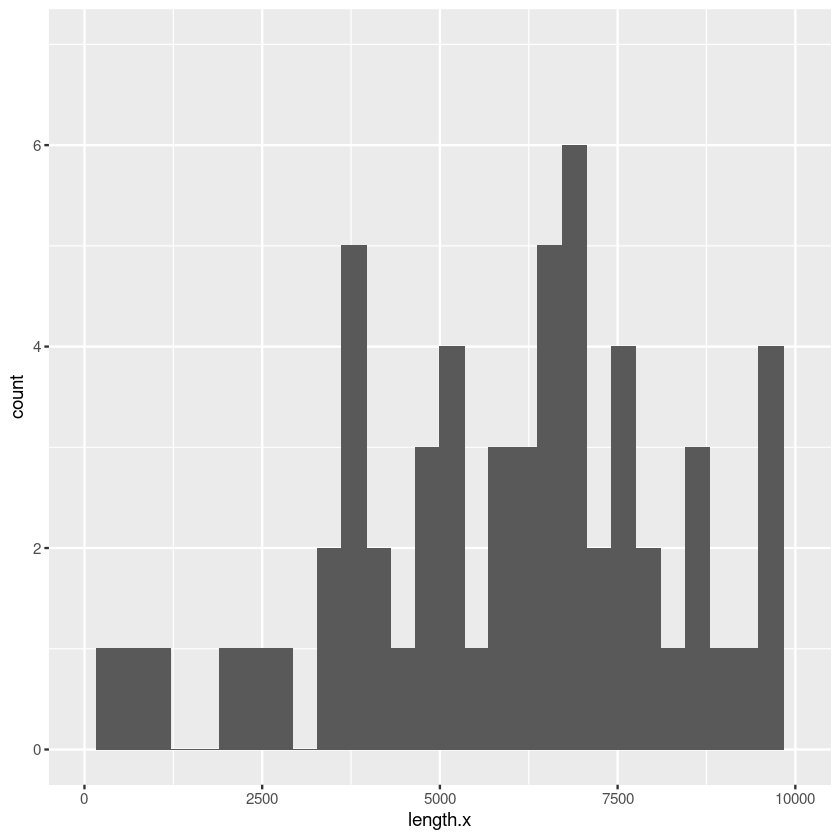

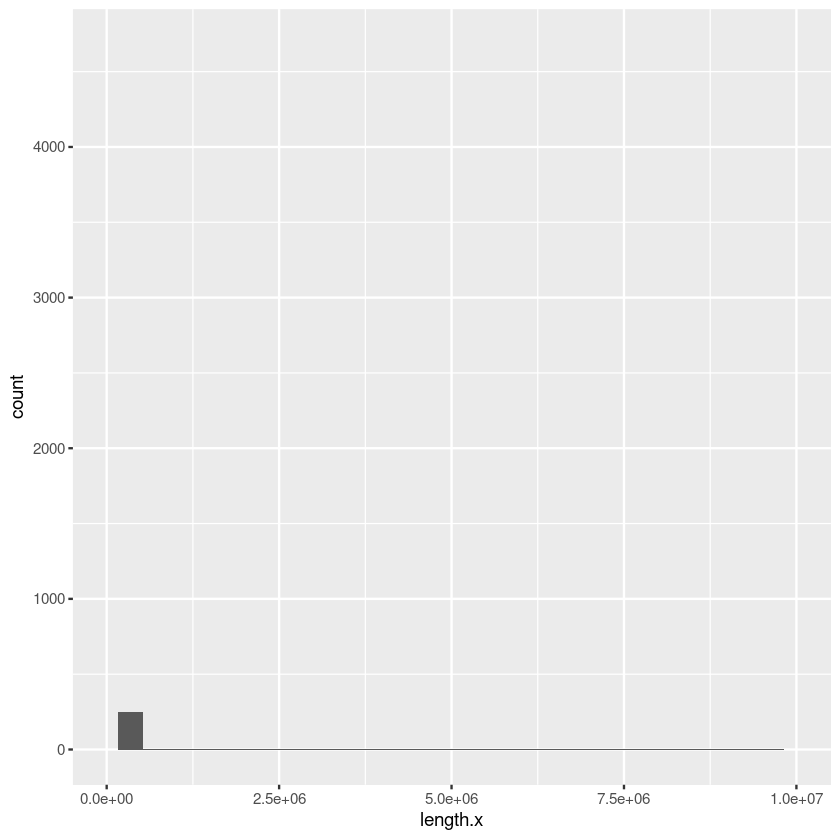

In [10]:
#Contig Length distribution
c <- ggplot(blob,aes(length.x))
c+ geom_histogram()
c+ geom_histogram() + xlim(0,10000)
c+ geom_histogram() + xlim(10000,10000000)

In [73]:
#Testing cutoffs:
#Order
#1) keep all "Arthropoda" hits
#2) of the rest remove icov < 1.5
#3) GC > 0.42
#4) len < 2500

In [11]:
Arthro_blob <- blob %>%
filter(phylum.t.6.s.x=="Arthropoda")

In [15]:
blob_nonArthro_keep <- blob %>%
filter(phylum.t.6.s.x!="Arthropoda") #%>%
#filter(ibam0 >= 2) %>%
#filter(GC.x <= 0.4) %>%
#filter(length.x >= 5000)

In [19]:
nrow(blob)
nrow(Arthro_blob)
nrow(blob_nonArthro_keep)
#keep.names <- c(Arthro_blob$name,blob_nonArthro_keep$name)
# Only keeping Arthro hits no other filtering.
keep.names <- c(Arthro_blob$name)

[1] 4993

[1] 3368

[1] 1625

In [20]:
length(keep.names)

[1] 3368

In [21]:
write(keep.names, file="/workspace/hraijc/Bee/BeeT/Assemblies/blobplots/HiFi18.keep.txt")